#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Boston, Massachusetts, United States*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Boston, Massachusetts, United States, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [28]:
# importar os pacotes necessarios
import pandas as pd
import seaborn as sns
import numpy as np


import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("listings.csv")

In [9]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [10]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,125,32,21,2021-07-25,0.29,1,153,4,NaN
1,5506,** Private! Minutes to center!**,8229,Terry,NaN,Roxbury,42.32981,-71.09559,Entire home/apt,124,3,108,2021-07-19,0.90,10,46,1,Approved by the government
2,6695,Home Away from Home! Condo,8229,Terry,NaN,Roxbury,42.32994,-71.09351,Entire home/apt,169,3,115,2019-11-02,1.33,10,62,0,STR446650
3,8789,Curved Glass Studio/1bd facing Park,26988,Anne,NaN,Downtown,42.35919,-71.06265,Entire home/apt,110,91,25,2019-09-30,0.30,5,310,0,NaN
4,10730,Bright 1bed facing Golden Dome,26988,Anne,NaN,Downtown,42.35840,-71.06185,Entire home/apt,100,91,32,2020-04-16,0.40,5,277,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [11]:
def print_df_dimensions(df):
    print("DIMENSÕES DO DATAFRAME:")
    print(f"Linhas:\t\t{df.shape[0]}")
    print(f"Colunas:\t{df.shape[1]}")

In [12]:
# identificar o volume de dados do DataFrame
print_df_dimensions(df)
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

DIMENSÕES DO DATAFRAME:
Linhas:		3123
Colunas:	18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

* A coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* A coluna `licence` possui valores nulos em quase metade das linhas.
* As variáveis `reviews_per_month` e `last_review` têm a mesma proporção de valores nulos, isso devido a serem dependentes

In [24]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isna().sum() / df.shape[0]).sort_values(ascending=False) * 100

neighbourhood_group               100.000000
license                            45.405059
reviews_per_month                  27.121358
last_review                        27.121358
longitude                           0.000000
name                                0.000000
host_id                             0.000000
host_name                           0.000000
neighbourhood                       0.000000
latitude                            0.000000
room_type                           0.000000
number_of_reviews_ltm               0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Visualizando as distribuições, podemos notar que há possíveis outliers em `price`, `reviews_per_month`, `minimum_nights`,
`number_of_reviews`, `number_of_reviews_ltm` e`calculated_host_listings_count`

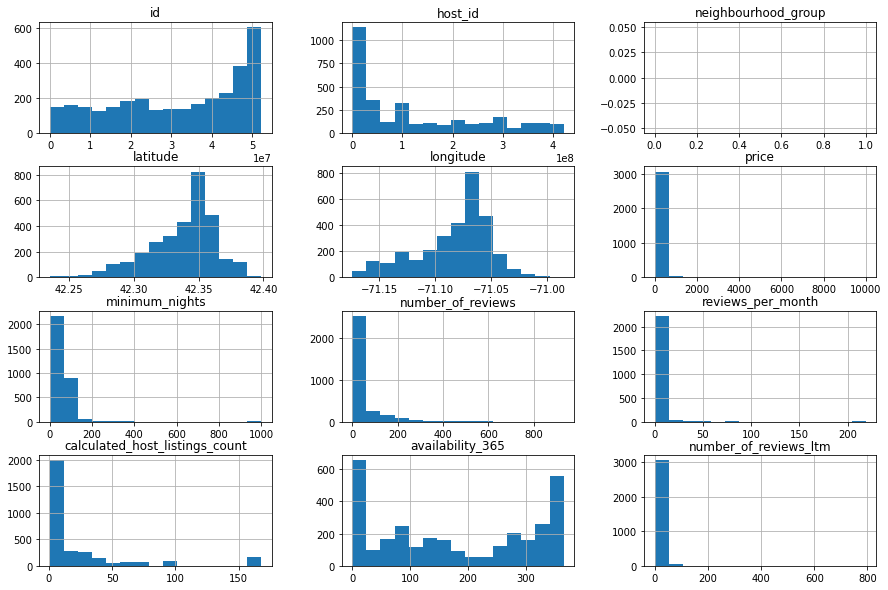

In [21]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [22]:
# ver a média da coluna `price``

df['price'].mean()


190.03298110790905

In [26]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'reviews_per_month', 'minimum_nights',
'number_of_reviews', 'number_of_reviews_ltm', 'calculated_host_listings_count']].describe()

,price,reviews_per_month,minimum_nights,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count
count,3123.000000,2276.000000,3123.000000,3123.000000,3123.000000,3123.000000
mean,190.032981,2.735523,39.328210,39.346462,7.214217,23.429075
std,278.113477,8.611857,49.534051,76.346816,22.382354,40.748274
min,0.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,80.000000,0.290000,2.000000,0.000000,0.000000,1.000000
50%,141.000000,1.115000,29.000000,7.000000,0.000000,5.000000
75%,227.000000,2.990000,91.000000,39.000000,6.500000,26.000000
max,10000.000000,219.000000,1000.000000,932.000000,794.000000,168.000000


Podemos visualizar que o realmente possuem pontos fora da curva, como price em 10000 e minimum nigths em 1000.

In [32]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

### **Q4. Qual a correlação existente entre as variáveis**

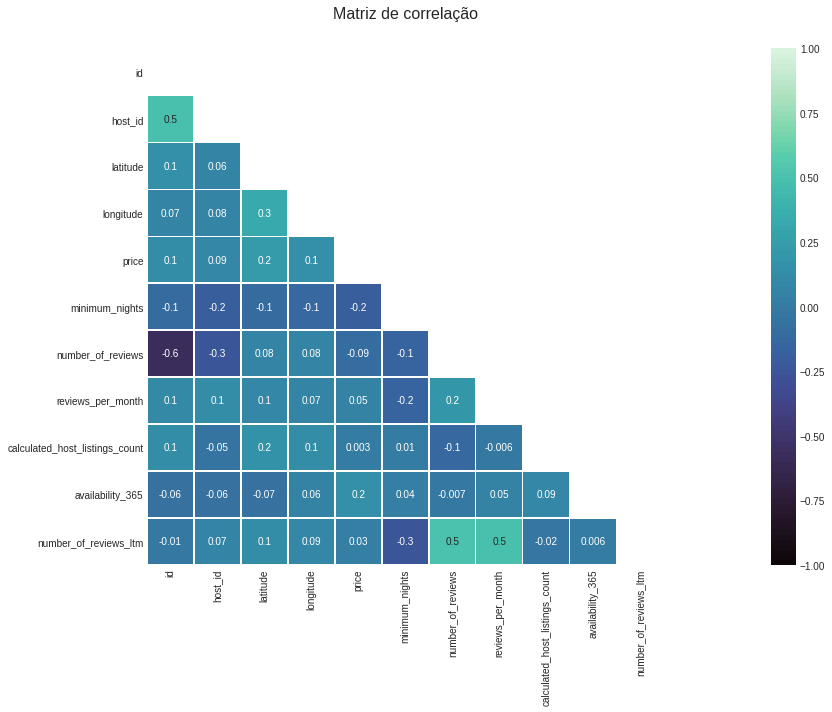

In [33]:
# criar uma matriz de correlação
corr = df_clean.corr()

# mostrar a matriz de correlação
plt.style.use('seaborn-whitegrid')
fig_dims = (30,10)
fig, ax = plt.subplots(figsize=fig_dims) 

ax.set_title("Matriz de correlação", fontsize=16, pad=30)

# gerando mascara para a diagonal superior ficar vazia
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("mako", 100), 
            mask=mask, 
            annot=True,
            fmt='.1g',
            linewidths=.5);
plt.tight_layout()

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

In [36]:
def get_distribution(df, column):
    """
        Retorna a quantidade e a porcentagem de valores em uma coluna
    :param df: df
    :param column: nome da coluna
    :return:
    """
    df1 = df[column].value_counts().rename_axis(column).reset_index(name='QTD')
    df2 = (df[column].value_counts(normalize=True) * 100).rename_axis(column).reset_index(name='%').drop(
        columns=column)
    return pd.concat([df1, df2], axis=1)

In [37]:
# mostrar a quantidade de cada tipo de imóvel disponível
get_distribution(df_clean, 'room_type')

,room_type,QTD,%
0,Entire home/apt,1213,63.275952
1,Private room,676,35.263432
2,Hotel room,22,1.147626
3,Shared room,6,0.312989


### **Q6. Qual a localidade mais cara do dataset?**



In [41]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)

neighbourhood
Chinatown                  330.863636
Downtown                   285.936842
Fenway                     283.237288
West End                   273.916667
Back Bay                   271.699115
North End                  265.333333
Charlestown                229.510638
Beacon Hill                223.419355
South Boston               220.078652
Longwood Medical Area      219.000000
South End                  205.762195
Mission Hill               184.600000
Jamaica Plain              180.642857
South Boston Waterfront    169.636364
East Boston                154.508621
Allston                    144.666667
Bay Village                143.488372
Roxbury                    139.609756
Dorchester                 133.500000
Brighton                   128.785714
Roslindale                 107.913043
Mattapan                   102.296296
Hyde Park                  100.592593
West Roxbury                93.571429
Name: price, dtype: float64

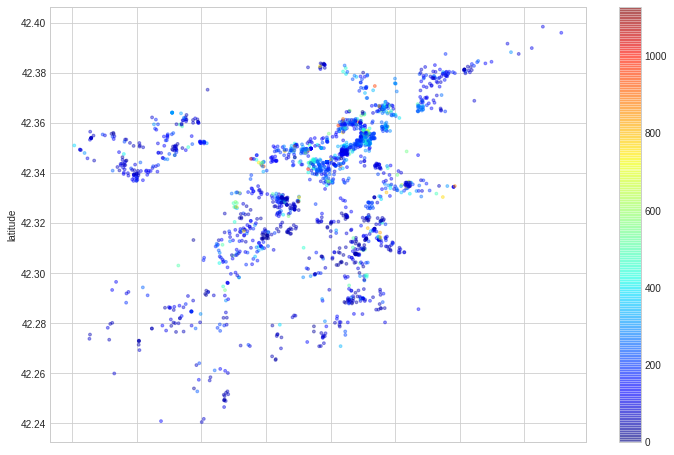

In [45]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [47]:
# ver a média da coluna `minimum_nights``

df_clean['minimum_nights'].mean()

10.710485133020343

## Conclusões

Foi feita uma análise superficial (contendo alguns outliers que necessitariam uma análise mais profunda), mas já temos alguns _insights_, a saber:

 - O preço médio de um Airbnb em Boston, pernoite, é de 190 dols
 - O local mais caro, é Chinatown, com a média de 330 dols
 - 'Entire home/apt' é o tipo mais alugado.
 
 Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.
